# Electric Vehicle Charging Duration Prediction

We are working with Electric Vehicle Charging Patterns data set.<br>
we want to predict  the charging duration of electric vehicles(EV's). <br>
target column is 'Charging Duration (hours)'

## 1. Import required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

## 2. Load data set (ev_charging_patterns.csv)

In [5]:
df = pd.read_csv('ev_charging_patterns.csv')
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [6]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

## 3. Check for Missing Values

In [8]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

## 4. Impute Missing Values (Mean Imputation)

In [10]:
# Perform mean imputation for Energy Consumed (kWh)
df['Energy Consumed (kWh)'] = df['Energy Consumed (kWh)'].fillna(df['Energy Consumed (kWh)'].mean())

# Perform mean imputation for Charging Rate (kW)
df['Charging Rate (kW)'] = df['Charging Rate (kW)'].fillna(df['Charging Rate (kW)'].mean())

# Perform mean imputation for Distance Driven (since last charge) (km)
df['Distance Driven (since last charge) (km)'] = df['Distance Driven (since last charge) (km)'].fillna(df['Distance Driven (since last charge) (km)'].mean())

In [11]:
df.isnull().sum()

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

## 5. Dataset Overview

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1320 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1320 non-null   float64
 10  Charging Cost (USD)                 

In [14]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,21.843792,1.061037,13.656279,10.751494,24.074134,17.080580,83.825619,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,24.868084,1.397623,14.431294,13.368141,27.786903,62.053266,81.931571,2.800664,2.000000
50%,75.000000,42.642894,2.258136,25.963003,22.076360,48.241771,75.682496,153.596788,14.630846,4.000000
75%,85.000000,60.545496,3.112806,36.955838,31.646044,69.277921,88.201370,221.962330,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


## 6. Normalize Numerical Columns

The df includes several numerical columns like energy consumed, charging rate, and vehicle age, which are standardized for better model performance.  <br> <br>First, Z-scores are calculated for these columns to identify outliers, with values above 3 or below -3 being considered extreme. Rows with such outliers are removed from the dataset. Then, the numerical columns are standardized so that they all have a mean of 0 and a standard deviation of 1.  <br> <br>This process ensures that all features are on a similar scale, which improves the effectiveness of machine learning models.

In [16]:
# Columns for scaling
scaling_columns = ['Energy Consumed (kWh)', 'Charging Rate (kW)','State of Charge (Start %)', 
                    'State of Charge (End %)','Distance Driven (since last charge) (km)', 
                    'Temperature (°C)','Vehicle Age (years)']

# Calculate Z-scores for numerical columns
z_scores = df[scaling_columns].apply(zscore)

# Set a threshold for Z-scores (usually 3 or -3)
threshold = 3

# Remove rows with Z-scores greater than the threshold in any column
df = df[(z_scores < threshold).all(axis=1)]

scaler = StandardScaler()
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [17]:
df[scaling_columns].head()

,Energy Consumed (kWh),Charging Rate (kW),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
0,0.840256,0.796599,-0.824384,0.727077,1.676752,0.881274,-0.700331
1,-1.403872,0.368021,-1.636106,0.635620,-0.491609,-0.052007,-0.261990
2,-1.088888,0.130589,-1.773579,-0.290918,-0.973259,0.405909,-0.700331
3,1.709898,0.533491,1.441363,1.575558,0.553388,1.590862,-1.138673
4,-1.065681,-1.167417,0.224735,-0.678821,0.602182,-1.567576,-1.138673


## 7. Feature Engineering

### 7.1 Extract Time-Related Features

The charging start and end times are converted to datetime format. Then, additional features related to time are extracted. The hour, day name, and month of the charging start time are stored as new columns.<br>

In [20]:
# Convert columns to datetime format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Feature Engineering: Extract additional time-related features
df['Charging Start Hour'] = df['Charging Start Time'].dt.hour
df['Charging Start Day'] = df['Charging Start Time'].dt.day_name()
df['Charging Start Month'] = df['Charging Start Time'].dt.month

In [21]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type',
       'Charging Start Hour', 'Charging Start Day', 'Charging Start Month'],
      dtype='object')

### 7.2  Add New Features to Dataset

New features are added to the dataset to capture different aspects of the charging process. These include charging efficiency, energy consumed per charge percentage, distance per kWh, total charge gained, and charger efficiency.<br><br> Any divisions by zero or invalid values (like infinity or NaN) are handled by replacing them with zero.<br><br> Additionally, a new feature for temperature-adjusted consumption is created, assuming 20°C as the reference temperature. This feature accounts for the effect of temperature on energy consumption during charging.

In [23]:
# Adding the new features
df['Charging Efficiency'] = df['Energy Consumed (kWh)'] / df['Charging Duration (hours)']

df['Energy per Charge %'] = df['Energy Consumed (kWh)'] / (df['State of Charge (End %)'] - df['State of Charge (Start %)'])

df['Distance per kWh'] = df['Distance Driven (since last charge) (km)'] / df['Energy Consumed (kWh)']

df['Total Charge Gained'] = df['State of Charge (End %)'] - df['State of Charge (Start %)']

df['Charger Efficiency'] = df['Charging Rate (kW)'] / df['Charging Duration (hours)']

# Handle possible division by zero or NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# For Temperature Adjusted Consumption, assuming 20°C as a reference temperature
average_temperature = 20
df['Temperature Adjusted Consumption'] = df['Energy Consumed (kWh)'] * (1 + abs(df['Temperature (°C)'] - average_temperature) / average_temperature)

In [24]:
# Ensure that the new features were added
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),...,User Type,Charging Start Hour,Charging Start Day,Charging Start Month,Charging Efficiency,Energy per Charge %,Distance per kWh,Total Charge Gained,Charger Efficiency,Temperature Adjusted Consumption
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,0.840256,0.591363,0.796599,...,Commuter,0,Monday,1,1.420880,0.541590,1.995525,1.551461,1.347055,1.643488
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,-1.403872,3.133652,0.368021,...,Casual Driver,1,Monday,1,-0.447999,-0.617976,0.350181,2.271726,0.117442,-2.811394
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,-1.088888,2.452653,0.130589,...,Commuter,2,Monday,1,-0.443963,-0.734415,0.893810,1.482661,0.053244,-2.155677
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,1.709898,1.266431,0.533491,...,Long-Distance Traveler,3,Monday,1,1.350171,12.741962,0.323638,0.134194,0.421255,3.283786
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,-1.065681,2.019765,-1.167417,...,Long-Distance Traveler,4,Monday,1,-0.527626,1.179431,-0.565068,-0.903556,-0.577997,-2.214890


In [25]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type',
       'Charging Start Hour', 'Charging Start Day', 'Charging Start Month',
       'Charging Efficiency', 'Energy per Charge %', 'Distance per kWh',
       'Total Charge Gained', 'Charger Efficiency',
       'Temperature Adjusted Consumption'],
      dtype='object')

### 7.3  Encode Categorical Features (One-Hot Encoding)

Categorical columns such as "Time of Day", "Day of Week", "Charging Start Day" etc., are converted into numerical values using one-hot encoding. This creates new binary columns for each category, helping the model understand these categorical features.

In [27]:
# One-hot encode categorical columns (e.g., Time of Day, Day of Week, Charging Start Day)
df = pd.get_dummies(df, columns=['Time of Day', 'Day of Week', 'Charging Start Day'], drop_first=True)
df = pd.get_dummies(df, columns=['Charger Type', 'User Type', 'Vehicle Model', 'Charging Station Location'])

In [28]:
df.head()

,User ID,Battery Capacity (kWh),Charging Station ID,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),...,Vehicle Model_BMW i3,Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Chicago,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco
0,User_1,108.463007,Station_391,2024-01-01 00:00:00,2024-01-01 00:39:00,0.840256,0.591363,0.796599,13.087717,-0.824384,...,True,False,False,False,False,False,True,False,False,False
1,User_2,100.000000,Station_428,2024-01-01 01:00:00,2024-01-01 03:01:00,-1.403872,3.133652,0.368021,21.128448,-1.636106,...,False,False,True,False,False,False,False,False,False,True
2,User_3,75.000000,Station_181,2024-01-01 02:00:00,2024-01-01 04:48:00,-1.088888,2.452653,0.130589,35.667270,-1.773579,...,False,True,False,False,False,False,False,False,False,True
3,User_4,50.000000,Station_327,2024-01-01 03:00:00,2024-01-01 06:42:00,1.709898,1.266431,0.533491,13.036239,1.441363,...,False,False,True,False,False,False,True,False,False,False
4,User_5,50.000000,Station_108,2024-01-01 04:00:00,2024-01-01 05:46:00,-1.065681,2.019765,-1.167417,10.161471,0.224735,...,False,False,True,False,False,False,False,True,False,False


In [29]:
df.columns

Index(['User ID', 'Battery Capacity (kWh)', 'Charging Station ID',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Vehicle Age (years)', 'Charging Start Hour',
       'Charging Start Month', 'Charging Efficiency', 'Energy per Charge %',
       'Distance per kWh', 'Total Charge Gained', 'Charger Efficiency',
       'Temperature Adjusted Consumption', 'Time of Day_Evening',
       'Time of Day_Morning', 'Time of Day_Night', 'Day of Week_Monday',
       'Day of Week_Saturday', 'Day of Week_Sunday', 'Day of Week_Thursday',
       'Day of Week_Tuesday', 'Day of Week_Wednesday',
       'Charging Start Day_Monday', 'Charging Start Day_Saturday',
       'Charging Start Day_Sunday', 'Charging Start Day_Thursday',
       'Charging Start Day_Tuesday'

### 7.4   Drop Irrelevant Columns

In [31]:
# Drop irrelevant columns (User ID and Charging Station ID may not be useful for prediction)
df = df.drop(columns=['User ID', 'Charging Station ID', 'Charging Start Time', 'Charging End Time', 'Charging Cost (USD)'])
# Ensure all other columns are numerical
print(df.dtypes)  # Check the data types to ensure all features are numeric

Battery Capacity (kWh)                      float64
Energy Consumed (kWh)                       float64
Charging Duration (hours)                   float64
Charging Rate (kW)                          float64
State of Charge (Start %)                   float64
State of Charge (End %)                     float64
Distance Driven (since last charge) (km)    float64
Temperature (°C)                            float64
Vehicle Age (years)                         float64
Charging Start Hour                           int32
Charging Start Month                          int32
Charging Efficiency                         float64
Energy per Charge %                         float64
Distance per kWh                            float64
Total Charge Gained                         float64
Charger Efficiency                          float64
Temperature Adjusted Consumption            float64
Time of Day_Evening                            bool
Time of Day_Morning                            bool
Time of Day_

## 8. Data Visualization

### 8.1 Correlation Heatmap

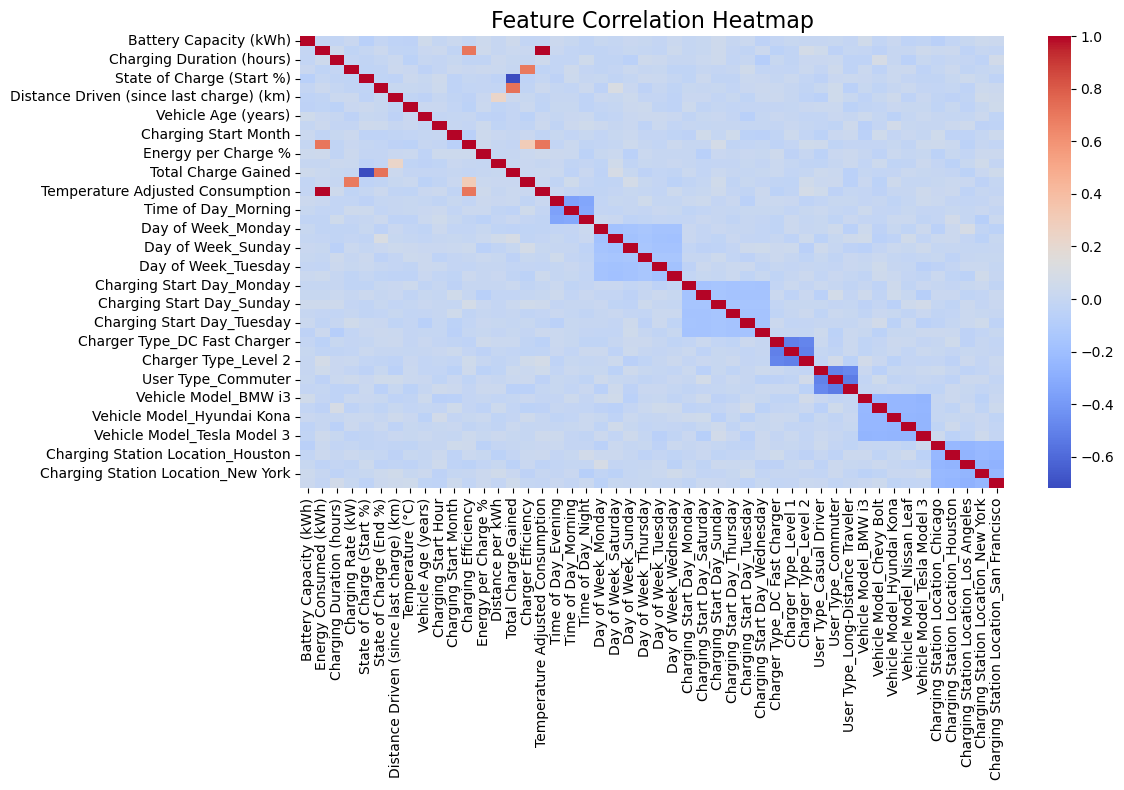

In [34]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            cmap="coolwarm",     # Use a color palette
            cbar=True)           # Add a color bar

# Add title
plt.title('Feature Correlation Heatmap', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

### 8.2 Pair Plot

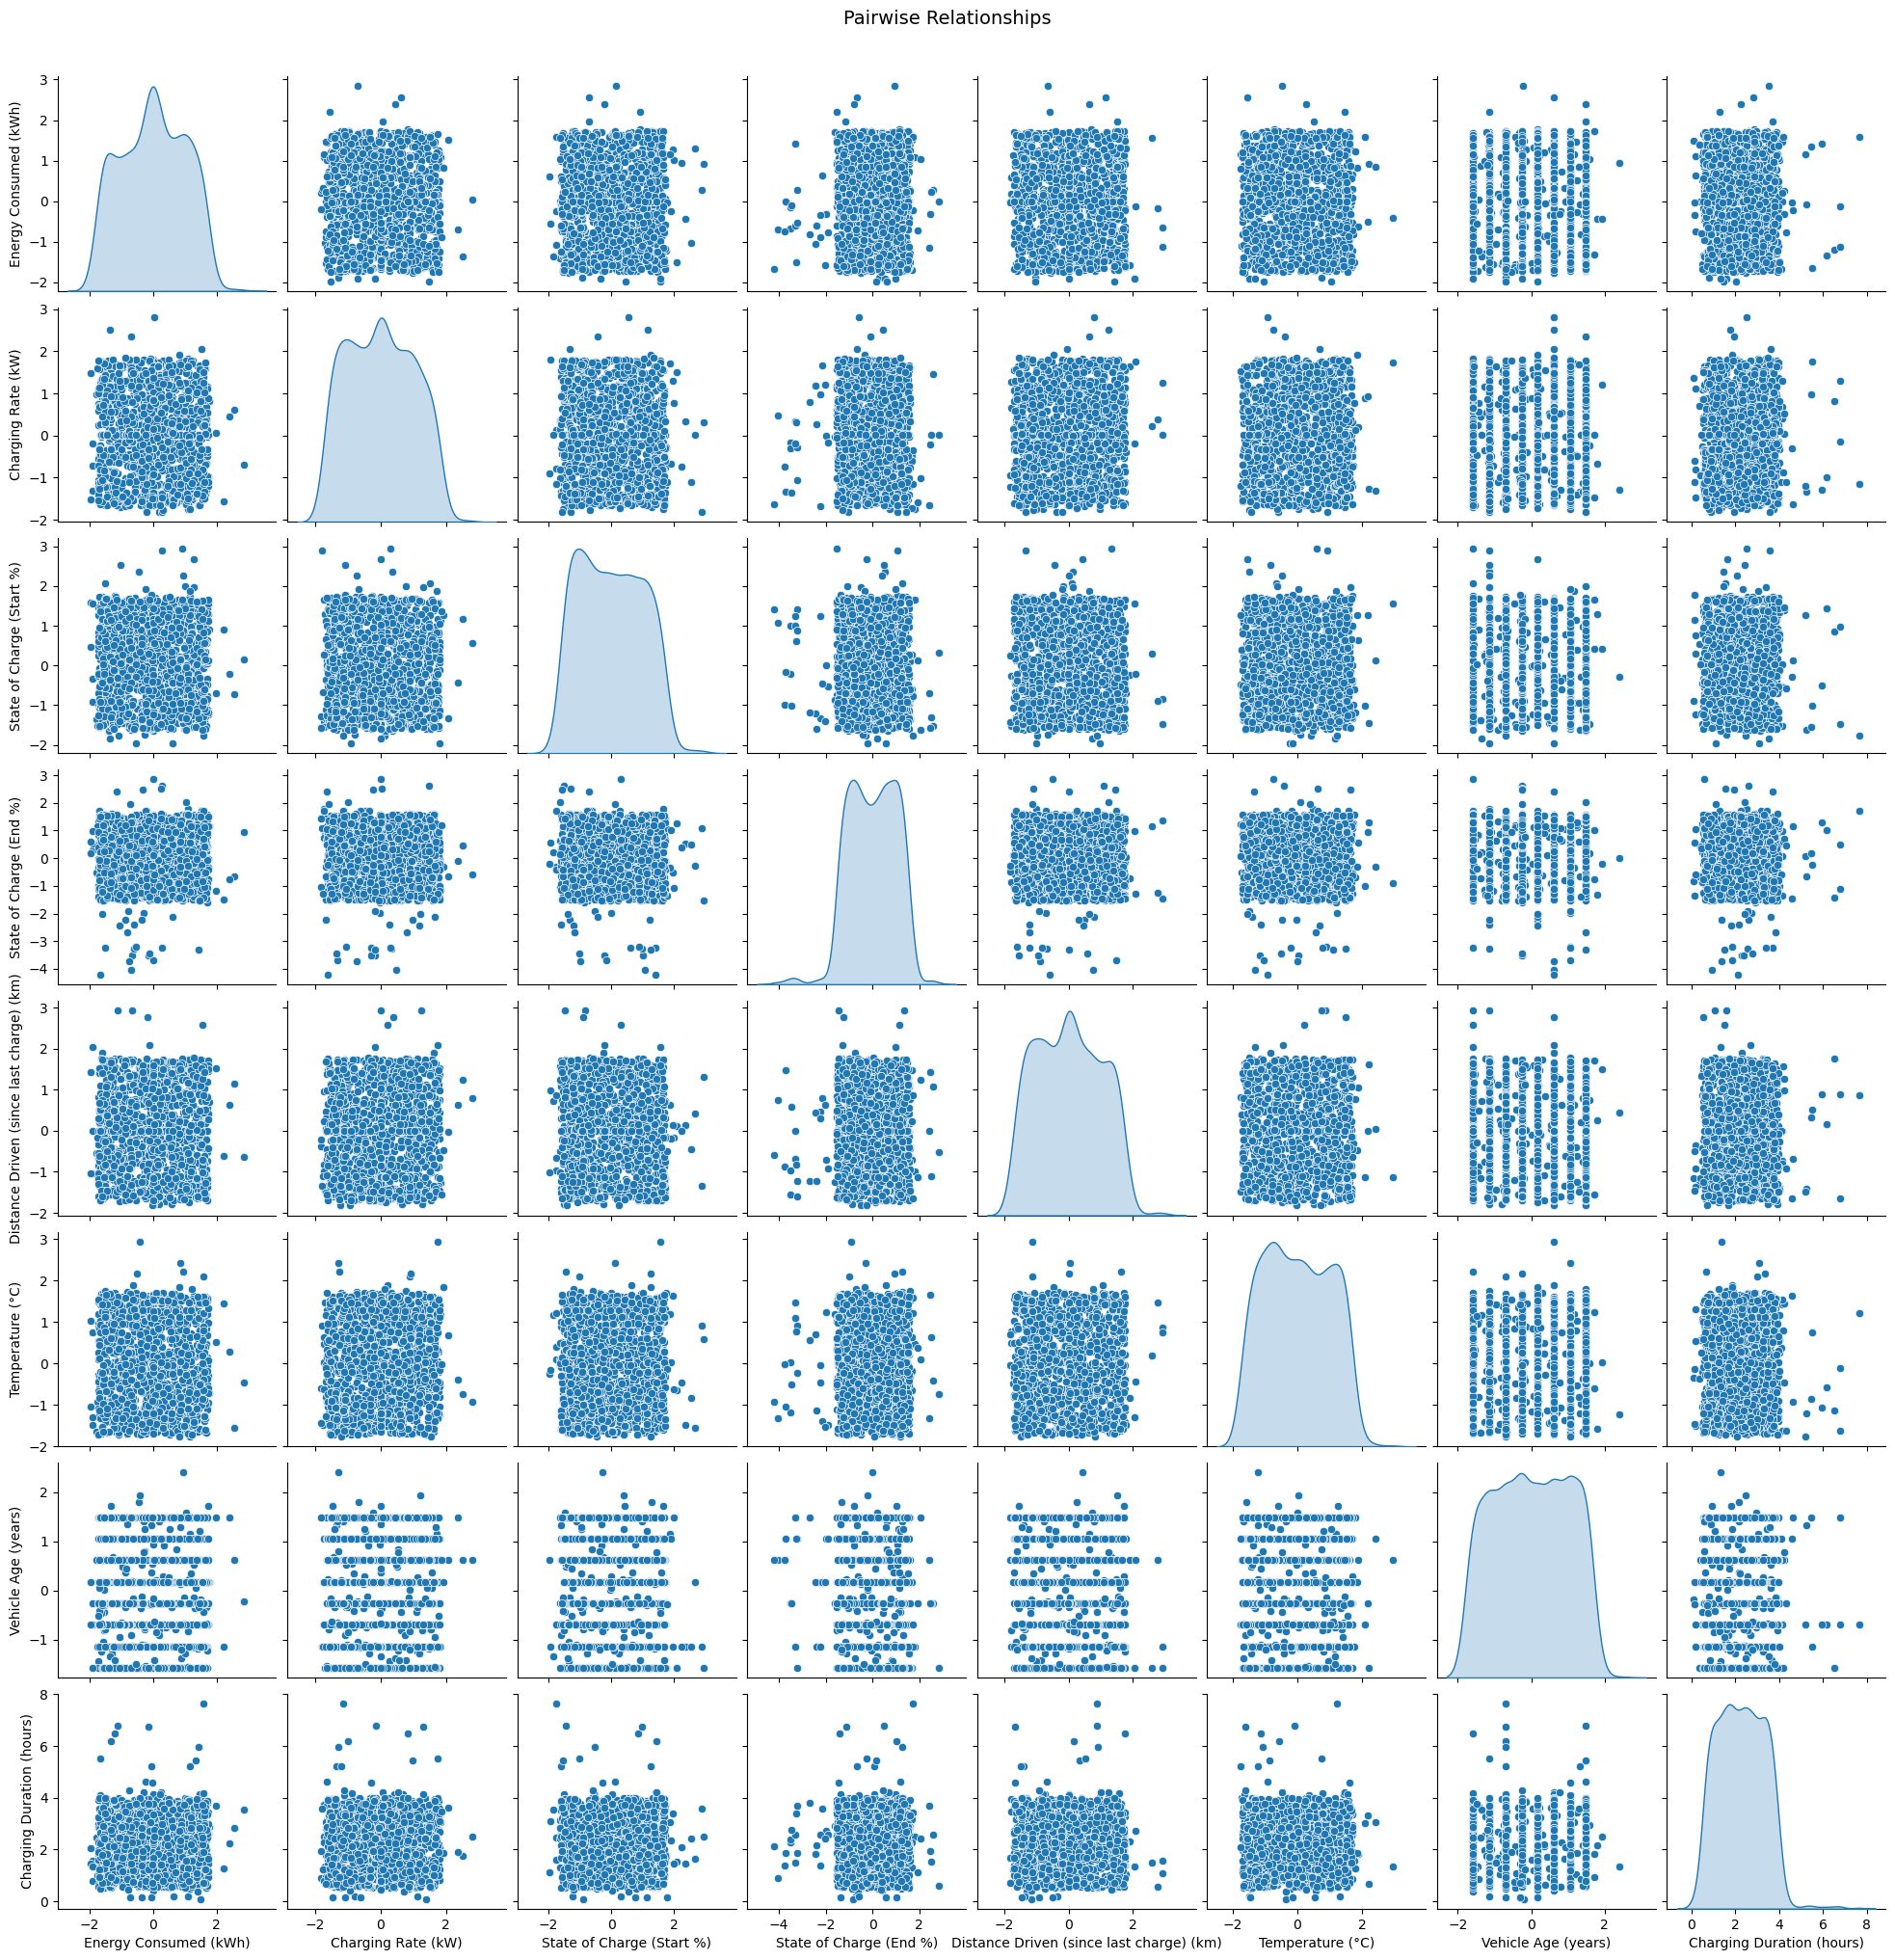

In [36]:
sns.pairplot(df, vars=scaling_columns + ['Charging Duration (hours)'], diag_kind='kde', hue=None)
plt.suptitle('Pairwise Relationships', y=1.02, fontsize=14)
plt.show()

### 8.3 Distribution of Target Variable

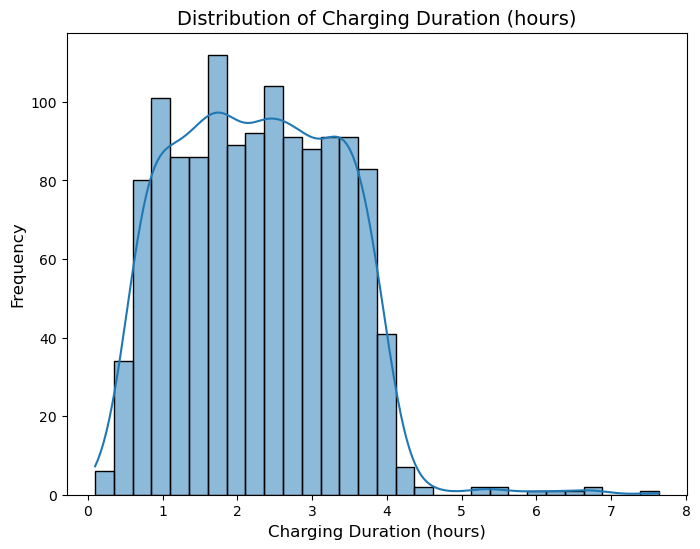

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Charging Duration (hours)'], kde=True, bins=30)
plt.title('Distribution of Charging Duration (hours)', fontsize=14)
plt.xlabel('Charging Duration (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## 9. Train-test split

In [40]:
X = df.drop(columns=['Charging Duration (hours)', ])  # Drop non-predictive columns
y = df['Charging Duration (hours)']  # This is our target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # Check the shape of the data

(1035, 47) (259, 47) (1035,) (259,)


## 10. LinearRegression Model

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

### 10.1 Train Linear Regression Model

In [43]:
# Train a Linear Regression Regressor
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

### 10.2 Evaluate the Linear Regression Model

In [45]:
# Evaluate the model

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = root_mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Root Mean Squared Error (RMSE): {rmse}")

# Calculate R² Score for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R² Score (Linear Regression): {r2_lr}")

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"Linear Regression CV MSE: {-np.mean(cv_scores_lr)}")

Linear Regression Mean Absolute Error (MAE): 0.8310701146437453
Linear Regression Mean Squared Error (MSE): 1.0260504039369764
Linear Regression Root Mean Squared Error (RMSE): 1.0129414612587326
R² Score (Linear Regression): 0.023547781940511325
Linear Regression CV MSE: 1.1714833870114307


### 10.3 Scatter Plot for True vs Predicted

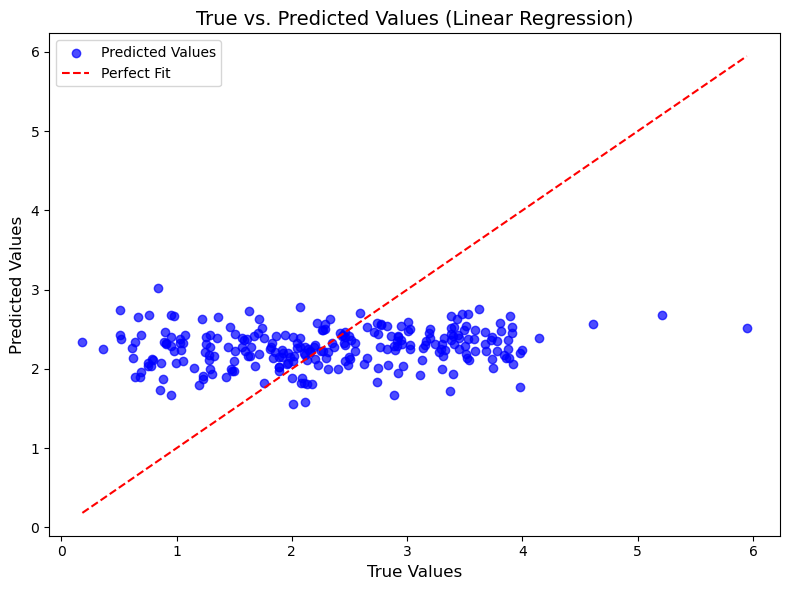

In [47]:
# Scatter Plot for True vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

# Labels and Title
plt.title('True vs. Predicted Values (Linear Regression)', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 11. Random Forest Regressor Model

A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy.

### 11.1 Train Random Forest Regressor Model

In [50]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

### 11.2 Evaluate the Forest Regressor Model

In [52]:
# Evaluate the model

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = root_mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse}")

# Calculate R² Score for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² Score (Random Forest): {r2_rf}")

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"Random Forest CV MSE: {-np.mean(cv_scores_rf)}")

Random Forest Mean Absolute Error (MAE): 0.24699087970709044
Random Forest Mean Squared Error (MSE): 0.14494615142840142
Random Forest Root Mean Squared Error (RMSE): 0.38071794208889265
R² Score (Random Forest): 0.8620603914599282
Random Forest CV MSE: 0.1802651566532934


### 11.3 Scatter Plot for True vs Predicted

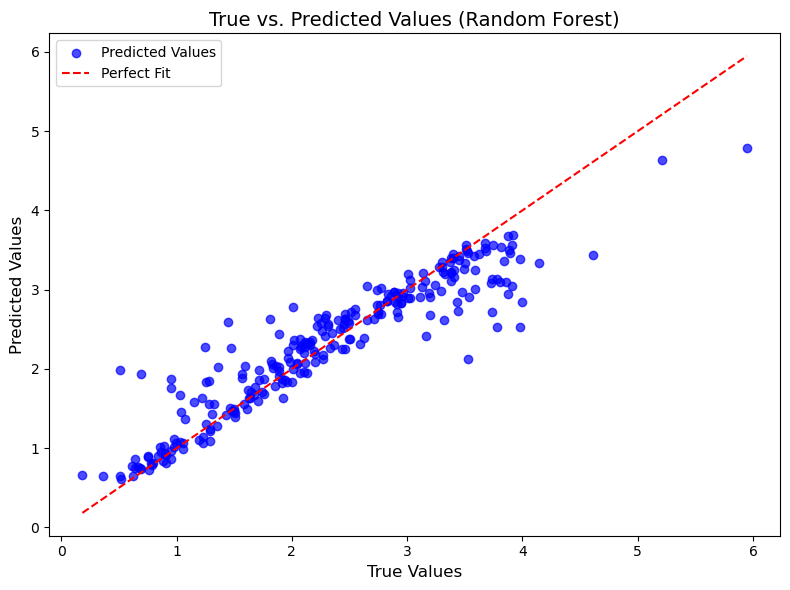

In [54]:
# Scatter Plot for True vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

# Labels and Title
plt.title('True vs. Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 11.4 Feature Importance (Random Forest)

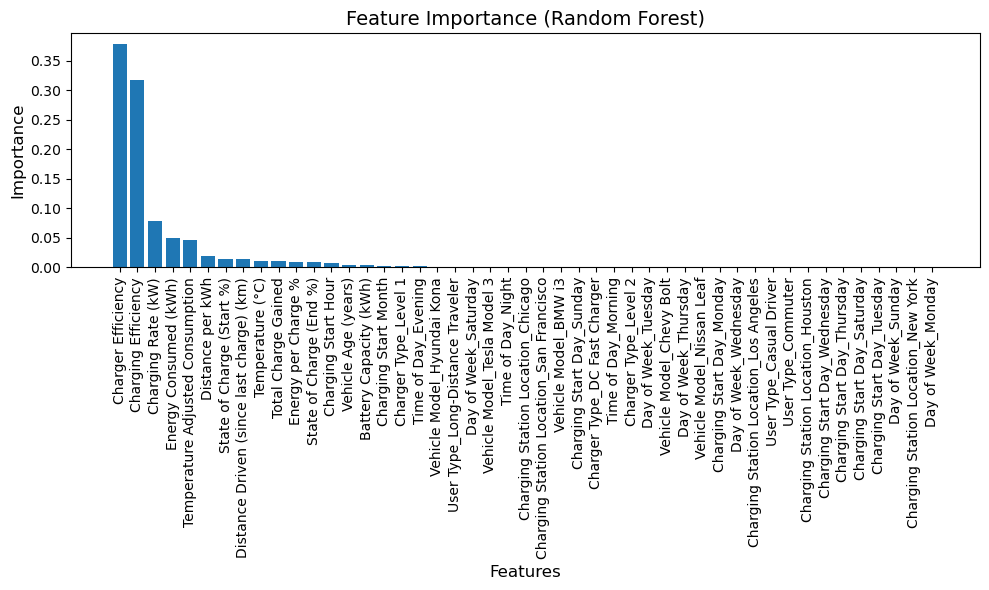

In [56]:
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

## 12. Results and discussion

### 12.1 Compare Model Performance

Mean Absolute Error (MAE): It calculates the average of the absolute differences between predicted and actual values. Lower values indicate better performance.<br><br>

Mean Squared Error (MSE): This metric squares the difference between predicted and actual values before averaging them. It's more sensitive to larger errors than MAE, meaning it penalizes larger prediction errors more significantly.<br><br>

Root Mean Squared Error (RMSE): The square root of MSE, RMSE gives an error value in the same units as the target variable. It's a widely used metric to evaluate the magnitude of prediction errors.<br><br>

R² Score: The R² score (or coefficient of determination) measures how well the model's predictions fit the actual data. A score of 1 indicates perfect predictions, while 0 indicates that the model does not explain the variance in the target variable.<br><br>


In [59]:
# Evaluate Linear Regression Model
print("### Linear Regression Evaluation ###")
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

# Evaluate Random Forest Model
print("\n### Random Forest Evaluation ###")
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


### Linear Regression Evaluation ###
Mean Absolute Error (MAE): 0.83
Mean Squared Error (MSE): 1.03
Root Mean Squared Error (RMSE): 1.01
R² Score: 0.02

### Random Forest Evaluation ###
Mean Absolute Error (MAE): 0.25
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.38
R² Score: 0.86


#### Observation: The Random Forest model performs much better than the Linear Regression model. It has a significantly lower Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), indicating better prediction accuracy. Additionally, the R² score for Random Forest is 0.86, meaning it explains 86% of the variance in the data, while the Linear Regression model has a very low R² score of 0.02, showing it does not fit the data well. This suggests that the Random Forest model is more suitable for this task.

### 12.2 Scatter Plot for True vs Predicted Values

Scatter plots to visually compare the true values of the target variable (charging duration) with the predicted values from two models: Linear Regression and Random Forest.<br><br>
The scatter plots give a clear visual representation of model performance. The closer the points are to the red dashed line, the better the model's predictions are.

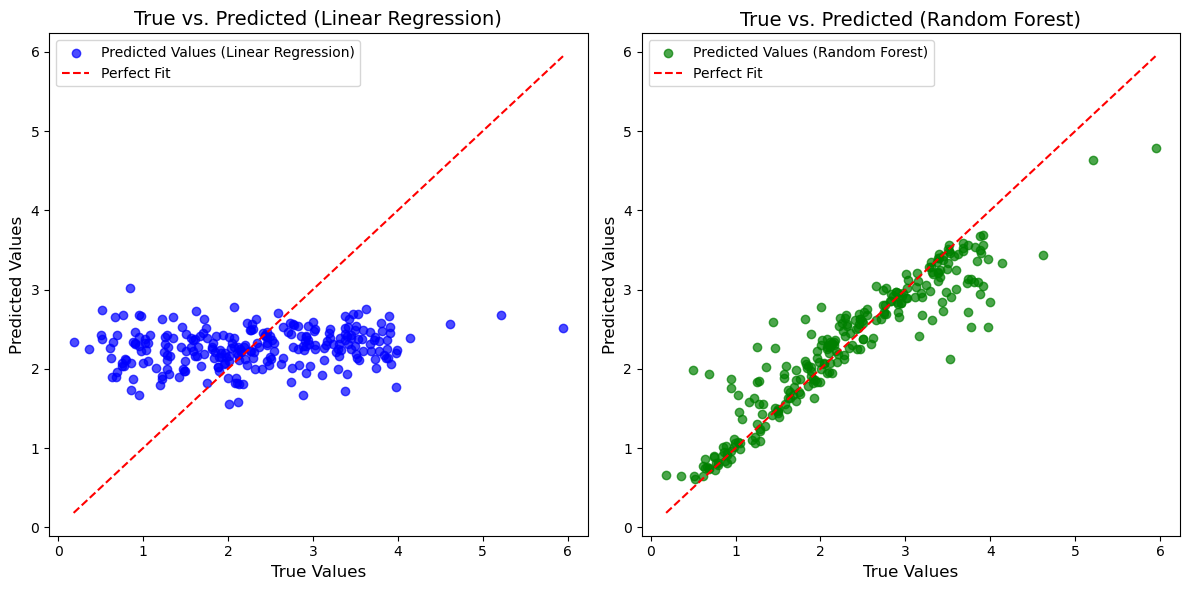

In [62]:
# Scatter Plot for True vs Predicted Values
plt.figure(figsize=(12, 6))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='Predicted Values (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('True vs. Predicted (Linear Regression)', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green', label='Predicted Values (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('True vs. Predicted (Random Forest)', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

#### Observation: From the plot, it appears that the random forest model (green dots) clusters around the perfect fit line more closely than the linear regression model (blue dots). This suggests that the random forest model may be making better predictions for this dataset.

### 12.3 Histograms of Residualss

histograms of residuals (errors) for two models: Linear Regression and Random Forest.

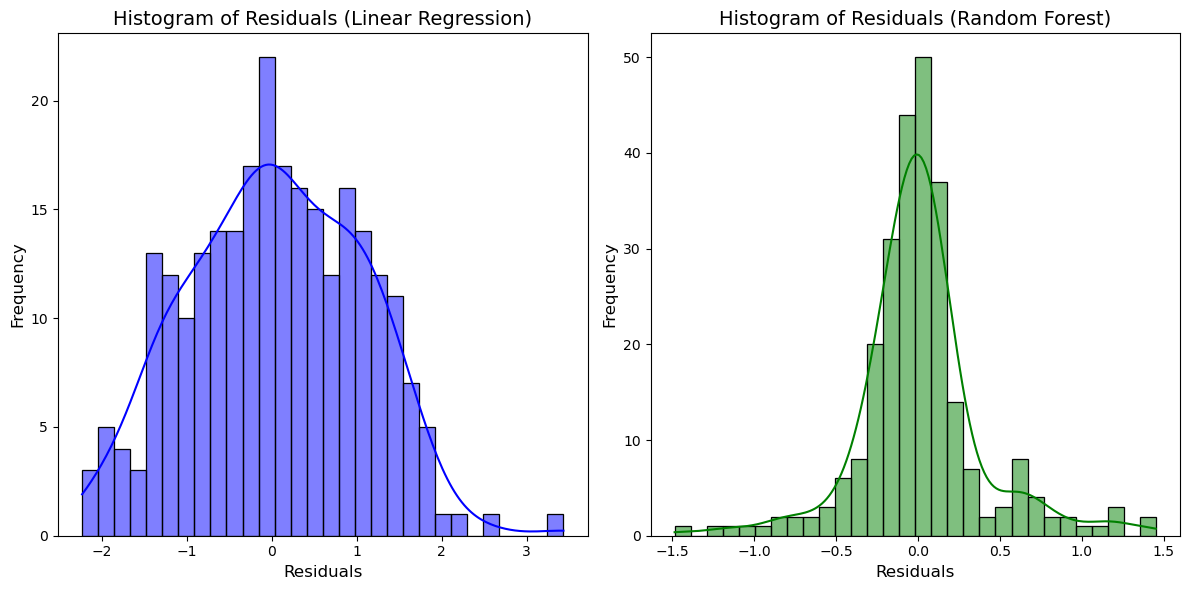

In [65]:
# Histogram of Residuals
plt.figure(figsize=(12, 6))

# Linear Regression Residuals
residuals_lr = y_test - y_pred_lr
plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, kde=True, bins=30, color='blue')
plt.title('Histogram of Residuals (Linear Regression)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Random Forest Residuals
residuals_rf = y_test - y_pred_rf
plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, kde=True, bins=30, color='green')
plt.title('Histogram of Residuals (Random Forest)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

#### Observation: The histograms show the distribution of residuals for both linear regression and random forest models.<br><br>Linear Regression: The histogram is roughly bell-shaped, indicating that the residuals are normally distributed. However, there's a slight right skew, suggesting that the model might overestimate some values.<br><br>Random Forest: The histogram is also bell-shaped, but it's more centered and symmetrical, suggesting that the model's predictions are more accurate and unbiased.<br><br>Overall, the random forest model appears to have a better distribution of residuals, indicating it might be a more suitable model for this dataset.

## 13. Other Models

### 13.1 MLP

MLP Regressor Mean Absolute Error (MAE): 0.8673586436162083
MLP Regressor Mean Squared Error (MSE): 1.1221030124708444
MLP Regressor Root Mean Squared Error (RMSE): 1.0592936384548168
R² Score (MLP Regressor): -0.06786174559675007
MLP Regressor CV MSE: 2.0762802286013833


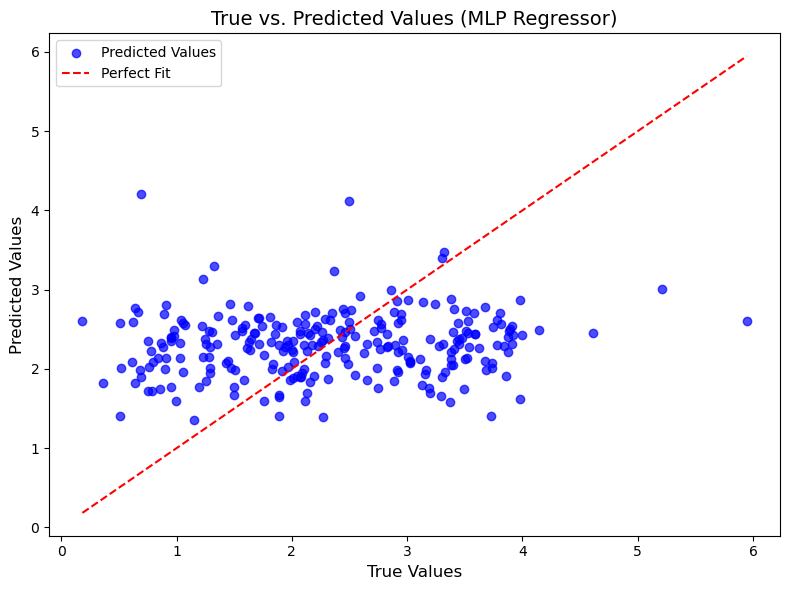

In [69]:
# Train an MLP Regressor
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_mlp)
print(f"MLP Regressor Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Regressor Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"MLP Regressor Root Mean Squared Error (RMSE): {rmse}")

# Calculate R² Score for MLP
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"R² Score (MLP Regressor): {r2_mlp}")

# Cross-validation for MLP Regressor
cv_scores_mlp = cross_val_score(mlp_model, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"MLP Regressor CV MSE: {-np.mean(cv_scores_mlp)}")

# Scatter Plot for True vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.7, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

# Labels and Title
plt.title('True vs. Predicted Values (MLP Regressor)', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 13.2 K-Nearest Neighbors Regressor (KNN)

KNN Regressor Mean Absolute Error (MAE): 0.8786868719563634
KNN Regressor Mean Squared Error (MSE): 1.2008441566024912
KNN Regressor Root Mean Squared Error (RMSE): 1.095830350283515
R² Score (KNN Regressor): -0.14279662651962832
KNN Regressor CV MSE: 1.2992100217034805


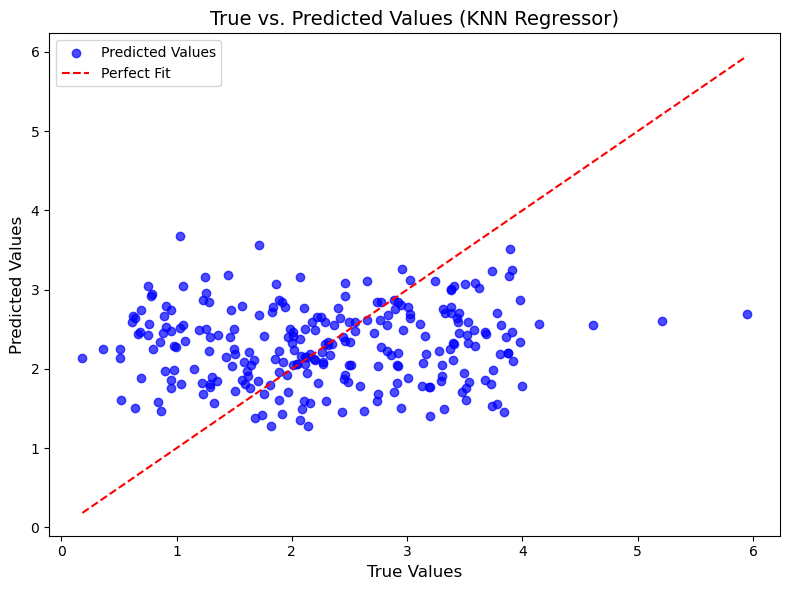

In [71]:
# Import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Train a KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_knn)
print(f"KNN Regressor Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Regressor Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"KNN Regressor Root Mean Squared Error (RMSE): {rmse}")

# Calculate R² Score for KNN
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R² Score (KNN Regressor): {r2_knn}")

# Cross-validation for KNN Regressor
cv_scores_knn = cross_val_score(knn_model, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"KNN Regressor CV MSE: {-np.mean(cv_scores_knn)}")

# Scatter Plot for True vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

# Labels and Title
plt.title('True vs. Predicted Values (KNN Regressor)', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()